### Problem Statement

You are a data scientist / AI engineer at a medical research firm. You have been provided with a dataset named **`"cancer_data.csv"`**, which includes medical and lifestyle information for 1500 patients. The dataset is designed to predict the presence of cancer based on various features. The dataset comprises the following columns:

- `age:` Integer values representing the patient's age, ranging from 20 to 80.
- `gender:` Binary values representing gender, where 0 indicates Male and 1 indicates Female.
- `bmi:` Continuous values representing Body Mass Index, ranging from 15 to 40.
- `smoking:` Binary values indicating smoking status, where 0 means No and 1 means Yes.
- `genetic_risk:` Categorical values representing genetic risk levels for cancer, with 0 indicating Low, 1 indicating Medium, and 2 indicating High.
- `physical_activity:` Continuous values representing the number of hours per week spent on physical activities, ranging from 0 to 10.
- `alcohol_intake:` Continuous values representing the number of alcohol units consumed per week, ranging from 0 to 5.
- `cancer_history:` Binary values indicating whether the patient has a personal history of cancer, where 0 means No and 1 means Yes.
- `diagnosis:` Binary values indicating the cancer diagnosis status, where 0 indicates No Cancer and 1 indicates Cancer.

  
Your task is to use this dataset to build and compare the performance of Decision Tree and Random Forest models to predict the presence of cancer. Additionally, explore various parameters of the RandomForestClassifier to enhance model performance.

**Dataset credits:** Rabie El Kharoua (https://www.kaggle.com/datasets/rabieelkharoua/cancer-prediction-dataset)

**Import Necessary Libraries**

In [2]:
#import necessary libraries
import pandas as pd
from sklearn.metrics  import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

### Task 1: Data Preparation and Exploration

1. Import the data from the `"cancer_data.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for any missing values in the dataset.

In [6]:
# Step 1: Import the data from the "cancer_data.csv" file and store it in a variable 'df'
df=pd.read_csv("cancer_data.csv")
# Step 2: Display the number of rows and columns in the dataset
print(df.shape)
print(df.head(5))

# Step 3: Display the first few rows of the dataset to get an overview


(1500, 9)
   age  gender        bmi  smoking  genetic_risk  physical_activity  \
0   58       1  16.085313        0             1           8.146251   
1   71       0  30.828784        0             1           9.361630   
2   48       1  38.785084        0             2           5.135179   
3   34       0  30.040295        0             0           9.502792   
4   62       1  35.479721        0             0           5.356890   

   alcohol_intake  cancer_history  diagnosis  
0        4.148219               1          1  
1        3.519683               0          0  
2        4.728368               0          1  
3        2.044636               0          0  
4        3.309849               0          1  


In [8]:
# Step 4: Check for any missing values in the dataset
df.isna().sum()

age                  0
gender               0
bmi                  0
smoking              0
genetic_risk         0
physical_activity    0
alcohol_intake       0
cancer_history       0
diagnosis            0
dtype: int64

In [10]:
df.describe()

,age,gender,bmi,smoking,genetic_risk,physical_activity,alcohol_intake,cancer_history,diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


### Task 2: Model Training Using Decision Tree Classifier

1. Select the features `(age, gender, bmi, smoking, genetic_risk, physical_activity, alcohol_intake, cancer_history)` and the target variable `(diagnosis)` for modeling.
2. Split the data into training and test sets with a test size of 25%.
3. Initialize and train a Decision Tree Classifier model using the training data.
4. Make predictions on the test set using the trained model.
5. Evaluate the model using a classification report and print the report.

In [100]:
# Step 1: Select the features and target variable for modeling
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion="gini")
X=df.drop("diagnosis",axis="columns")
y=df.diagnosis
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)
dc.fit(X_train,y_train)


# Step 2: Split the data into training and test sets with a test size of 25%


DecisionTreeClassifier()

In [32]:
# Step 3: Initialize and train a Decision Tree Classifier model using the training data

y_pred=dc.predict(X_test)
# Step 4: Make predictions on the test set using the trained model

cm=classification_report(y_test,y_pred)
# Step 5: Evaluate the model using a classification report and print the report
print(cm)

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       231
           1       0.86      0.78      0.82       144

    accuracy                           0.87       375
   macro avg       0.86      0.85      0.86       375
weighted avg       0.87      0.87      0.87       375



### Task 3: Model Training Using Random Forest Classifier

1. Initialize and train a Random Forest Classifier model with 25 estimators using the training data.
2. Make predictions on the test set using the trained model.
3. Evaluate the model using a classification report and print the report.

In [34]:
# Step 1: Initialize and train a Random Forest Classifier model with 25 estimators using the training data
randmodel=RandomForestClassifier(n_estimators=25)
# Step 2: Make predictions on the test set using the trained model

randmodel.fit(X_train,y_train)
# Step 3: Evaluate the model using a classification report and print the report
y_pred=randmodel.predict(X_test)

cm=classification_report(y_test,y_pred)

In [36]:
print(cm)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       231
           1       0.93      0.87      0.90       144

    accuracy                           0.93       375
   macro avg       0.93      0.91      0.92       375
weighted avg       0.93      0.93      0.92       375



### Task 4: Exploring Various Parameters in Random Forest Classifier

1. Train a Random Forest model with the following parameters:
   - n_estimators = 50
   - max_features = "log2"
   - criterion = "entropy"
   - bootstrap = False
   - max_depth = 15
   - min_samples_split = 5
   - min_samples_leaf = 3

Learn about these parameters here: [scikit-learn RandomForestClassifier Parameters](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)


--------------------------------------------------------------------------------------------------------------------------------------------------------
2. Evaluate the model using a classification report and print the report.

In [70]:
# Step 1: Initialize and train a Random Forest Classifier model with 25 estimators using the training data
randmodel=RandomForestClassifier(n_estimators=25,max_features="log2",criterion="entropy",bootstrap=True,random_state=42,max_depth=15,min_samples_split=5,min_samples_leaf=3)
# Step 2: Make predictions on the test set using the trained model

randmodel.fit(X_train,y_train)
# Step 3: Evaluate the model using a classification report and print the report
y_pred=randmodel.predict(X_test)

cm=classification_report(y_test,y_pred)

In [72]:
print(cm)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       231
           1       0.95      0.88      0.91       144

    accuracy                           0.93       375
   macro avg       0.94      0.92      0.93       375
weighted avg       0.93      0.93      0.93       375



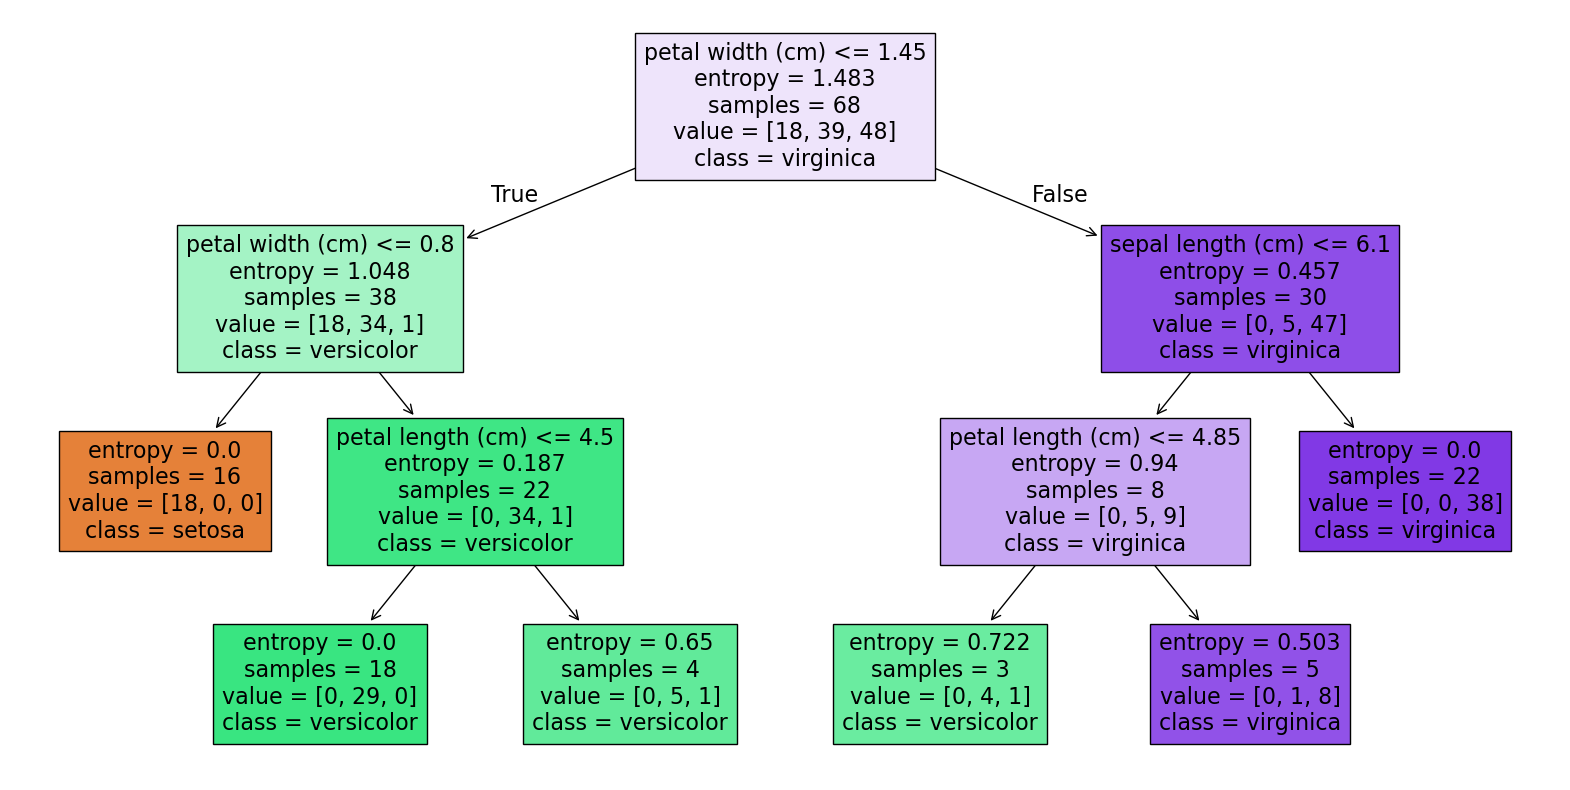

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [78]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, export_text
import graphviz
from sklearn import tree

# Load sample data
data = load_iris()
X = data.data
y = data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize RandomForestClassifier with the specified parameters
randmodel = RandomForestClassifier(
    n_estimators=25,
    max_features="log2",
    criterion="entropy",
    bootstrap=True,
    random_state=42,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=3
)

# Fit the model
randmodel.fit(X_train, y_train)

# Extract a single decision tree from the random forest
single_tree = randmodel.estimators_[0]

# Visualize the single decision tree
plt.figure(figsize=(20,10))
plot_tree(single_tree, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()

# Alternatively, export the tree to DOT format and render with graphviz
dot_data = tree.export_graphviz(
    single_tree,
    out_file=None,
    feature_names=data.feature_names,
    class_names=data.target_names,
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png")  # Saves the tree diagram as a PNG file
graph.view()  # Opens the PNG file


In [98]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

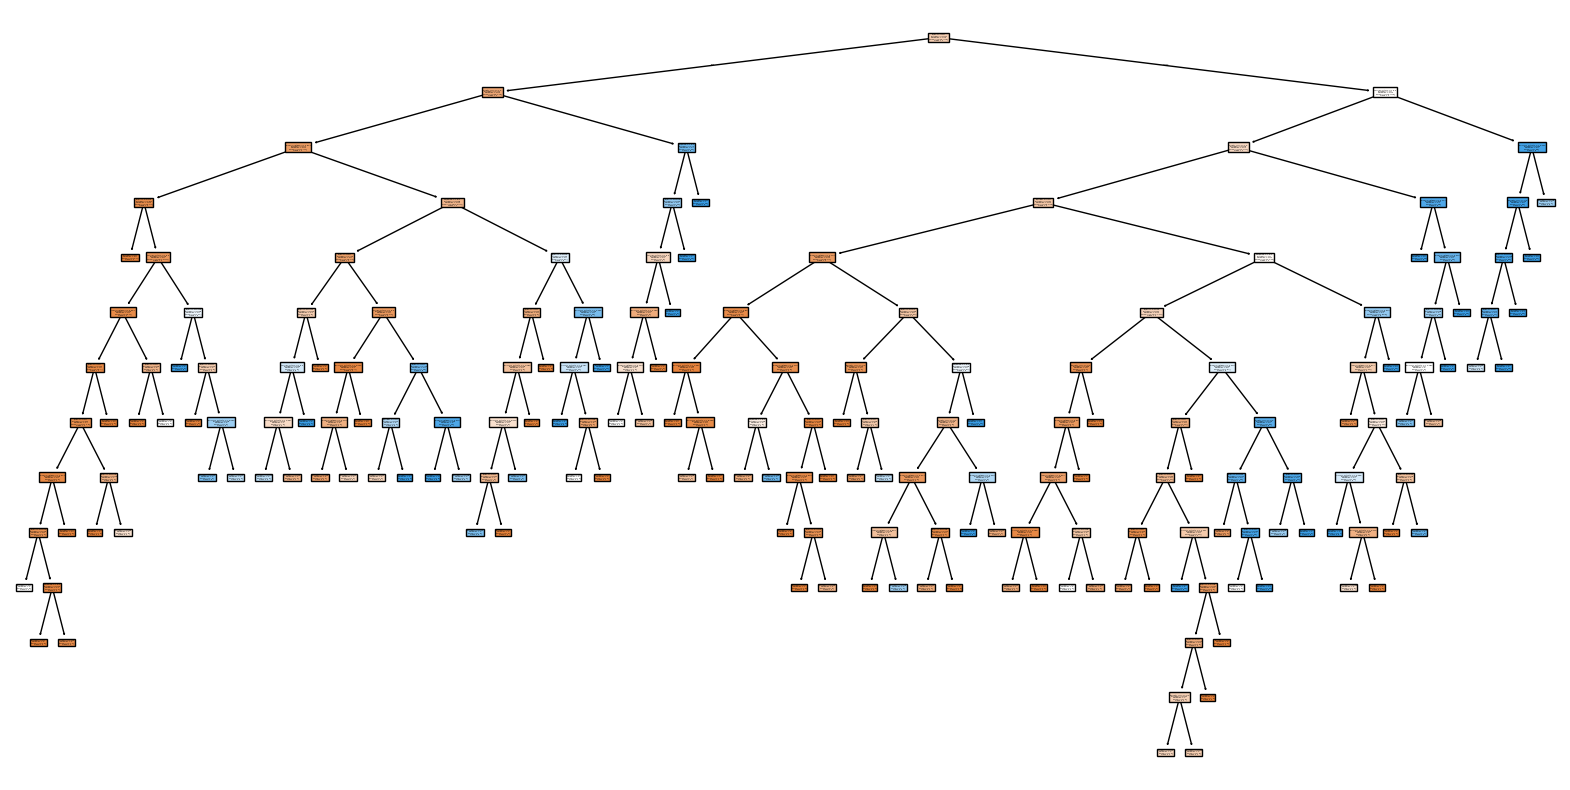

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [111]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, export_graphviz
import graphviz

# Sample data
# Assume df is your DataFrame and it has been loaded properly
# Drop the target column 'diagnosis' to get the feature set X
X = df.drop("diagnosis", axis="columns")

# Get the target variable y
y = df.diagnosis

# Ensure feature names are strings
feature_names = X.columns.astype(str)

# Ensure class names are strings
class_names = y.unique().astype(str)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

# Initialize and train the RandomForestClassifier
randmodel = RandomForestClassifier(n_estimators=25,
    max_features="log2",
    criterion="entropy",
    bootstrap=True,
    random_state=42,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=3)
randmodel.fit(X_train, y_train)

# Extract a single tree from the Random Forest
single_tree = randmodel.estimators_[0]  # You can choose any tree from the forest

# Visualize the decision tree using plot_tree
plt.figure(figsize=(20,10))
plot_tree(single_tree, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

# Alternatively, export the tree to DOT format and render with graphviz
dot_data = export_graphviz(
    single_tree,
    out_file=None,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png")  # Saves the tree diagram as a PNG file
graph.view()  # Opens the PNG file


In [109]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import pandas as pd

# Sample data
# Assume df is your DataFrame and it has been loaded properly
# Drop the target column 'diagnosis' to get the feature set X
X = df.drop("diagnosis", axis="columns")

# Get the target variable y
y = df.diagnosis

# Ensure feature names are strings
feature_names = X.columns.astype(str)

# Ensure class names are strings
class_names = y.unique().astype(str)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

# Initialize and train the RandomForestClassifier
randmodel = RandomForestClassifier(n_estimators=25,
    max_features="log2",
    criterion="entropy",
    bootstrap=True,
    random_state=42,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=3)
randmodel.fit(X_train, y_train)

# Extract a single tree from the Random Forest
single_tree = randmodel.estimators_[0]  # You can choose any tree from the forest

# Visualize and save the decision tree using plot_tree
plt.figure(figsize=(20,10))
plot_tree(single_tree, feature_names=feature_names, class_names=class_names, filled=True)
plt.title('Decision Tree')
plt.savefig('decision_tree_plot.png')  # Saves the tree diagram as a PNG file
plt.close()  # Close the figure window
